In [1]:
%autosave 1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stats


Autosaving every 1 seconds


## PV with square activation function and square in learning rule

In [2]:
def phi_square(_x):
    x = np.array([_x])
    x[x<=0] = 0
    x[x>0] = x[x>0]**2 
    x[x>20] = 20
    return x[0]

<ipython-input-3-32e68bedbca2>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./PV_activation_function.pdf', bbox_inches='tight',rasterized=True)


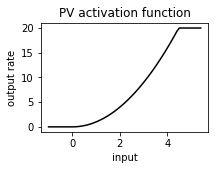

In [3]:
x = np.arange(-1,5.5,0.1)
y = np.empty((len(x)))
for i,x_i in enumerate(x):
    y[i] = phi_square(x_i)
    
plt.figure(figsize=(3,2))
plt.plot(x,y,'k')
plt.ylabel('output rate')
plt.xlabel('input')
plt.title('PV activation function')
plt.savefig('./PV_activation_function.pdf', bbox_inches='tight',rasterized=True)

<ipython-input-4-e0e20e66dbc8>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./SST_activation_function.pdf', bbox_inches='tight',rasterized=True)


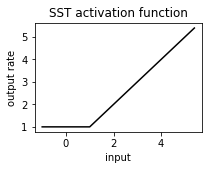

In [4]:
x = np.arange(-1,5.5,0.1)
y = np.ones((len(x)))
y[x>1]= x[x>1]
    
plt.figure(figsize=(3,2))
plt.plot(x,y,'k')
plt.ylabel('output rate')
plt.xlabel('input')
plt.title('SST activation function')
plt.savefig('./SST_activation_function.pdf', bbox_inches='tight',rasterized=True)

In [5]:
#sim parameters
dt = 1
T = 500000 # number of time steps

# time constants
tau_P = 1
tau_S = 1
tau_E = 1.0

# weights
# to PV
wPB = np.array([1.0])
wPY1 = np.array([6.0])
wPY2 = np.array([6.0])
wPX1 = np.array([0.01]) # small intitial weights
wPX2 = np.array([0.01]) # small intitial weights
wPS = np.array([-6.0])

# to SST
wSX1 = np.array([0.1]) # small intitial weights
wSX2 = np.array([0.1]) # small intitial weights
wSY1 = np.array([1.0])
wSY2 = np.array([1.0])

# to E
wEP = np.array([1.0])
wES = np.array([-1.0])
wEY1 = np.array([1.0])
wEY2 = np.array([1.0])

# nudging parameter
beta_S = 0.1 
beta_P = 0.1


# inputs
# sound
rX1 = np.zeros((T))
rX2 = np.zeros((T))
rX1[:int(T/2)] = 1
rX2[int(T/2):] = 1

# whisker
Y1_mean = 5.0
Y2_mean = 5.0
Y1_sigma = 0.5
Y2_sigma = 0.2

rY1 = Y1_sigma*np.random.randn(T)+Y1_mean
rY1[int(T/2):] = 0
rY2 = Y2_sigma*np.random.randn(T)+Y2_mean
rY2[:int(T/2)] = 0

#learning rate
eta_S = 0.1
eta_P = 0.001



<ipython-input-6-0a1a086a96b0>:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./whisker_input_y1.pdf', bbox_inches='tight',rasterized=True)


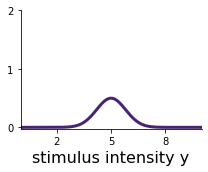

In [6]:
Y1_sigma = 0.8
Y2_sigma = 0.4

import scipy.stats as stats
x_values = np.arange(0, 10, 0.001)
y1_values = stats.norm(Y1_mean, Y1_sigma)
y2_values = stats.norm(Y2_mean, Y2_sigma)
plt.figure(figsize = (3,2.5))
a = plt.subplot(111)
plt.plot(x_values, y1_values.pdf(x_values), color = cm.viridis(0.1),linewidth =3,label='x1')
#plt.plot(x_values, y2_values.pdf(x_values), color = cm.viridis(0.5),linewidth =3,label='x2')
#plt.legend()
plt.xlim(0,10)
plt.yticks([0,1,2],[0,1,2])
plt.xticks([2,5,8],[2,5,8])
plt.xlabel('stimulus intensity y', fontsize = 16)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('./whisker_input_y1.pdf', bbox_inches='tight',rasterized=True)

<ipython-input-7-e8c13a350e81>:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./whisker_input.pdf', bbox_inches='tight',rasterized=True)


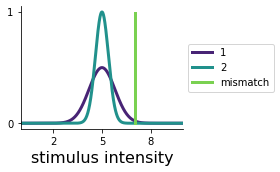

In [7]:
import scipy.stats as stats
x_values = np.arange(0, 10, 0.001)
y1_values = stats.norm(Y1_mean, Y1_sigma)
y2_values = stats.norm(Y2_mean, Y2_sigma)
plt.figure(figsize = (4,2.5))
a = plt.subplot(111)
plt.plot(x_values, y1_values.pdf(x_values), color = cm.viridis(0.1),linewidth =3,label='1')
plt.plot(x_values, y2_values.pdf(x_values), color = cm.viridis(0.5),linewidth =3,label='2')
plt.plot(np.ones((100))*7,np.arange(0,1,0.01),color = cm.viridis(0.8),linewidth=3, label = 'mismatch')
ldg = plt.legend()
plt.xlim(0,10)
plt.yticks([0,1],[0,1])
plt.xticks([2,5,8],[2,5,8])
plt.xlabel('stimulus intensity', fontsize = 16)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
a.legend(loc='center left', bbox_to_anchor=(1, 0.5),fancybox=True, shadow=False)
#a.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('./whisker_input.pdf', bbox_inches='tight',rasterized=True)

<ipython-input-8-da2113ec5a83>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./whisker_input_y2.pdf', bbox_inches='tight',rasterized=True)


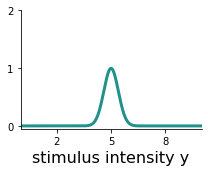

In [8]:
import scipy.stats as stats
x_values = np.arange(0, 10, 0.001)
y1_values = stats.norm(Y1_mean, Y1_sigma)
y2_values = stats.norm(Y2_mean, Y2_sigma)
plt.figure(figsize = (3,2.5))
a = plt.subplot(111)
#plt.plot(x_values, y1_values.pdf(x_values), color = cm.viridis(0.3),linewidth =3,label='x1')
plt.plot(x_values, y2_values.pdf(x_values), color = cm.viridis(0.5),linewidth =3,label='x2')
#plt.legend()
plt.xlim(0,10)
plt.yticks([0,1,2],[0,1,2])
plt.xticks([2,5,8],[2,5,8])
plt.xlabel('stimulus intensity y', fontsize = 16)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('./whisker_input_y2.pdf', bbox_inches='tight',rasterized=True)

In [9]:
#initial rates
rP = 0.0#phi_square(rB[0])
rS = 0.0
rE = 0.0

# monitors
rP_monitor = np.empty((T))
wPX1_monitor = np.empty((T))
wPX2_monitor = np.empty((T))
rE_monitor = np.empty((T))

rS_monitor = np.empty((T))
IS_monitor = np.empty((T))
IP_monitor = np.empty((T))
X_in_monitor = np.empty((T))
Y_in_monitor = np.empty((T))
S_in_monitor = np.empty((T))
YS_in_monitor = np.empty((T))

wSX1_monitor = np.empty((T))
wSX2_monitor = np.empty((T))
deltaw_monitor = np.empty((T))
deltawcontrol_monitor = np.empty((T))

actual = np.empty((T))
actual_control = np.empty((T))

target = np.empty((T))

for t in range(T):

    drS = (-rS + (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1[t] + wSY2 * rY2[t]))/tau_S
    drP = (-rP + phi_square(((1-beta_P)*(wPX1 * rX1[t] + wPX2 * rX2[t]) + beta_P*(wPY1 * rY1[t] + wPY2 * rY2[t] + wPS * rS))))/tau_P
    drE = (-rE + 1.0/(1.0 + wEP * rP) * (wEY1 * rY1[t] + wEY2 * rY2[t] + wES * rS))/tau_E

    # store monitors
    rP_monitor[t] = rP
    rS_monitor[t] = rS
    rE_monitor[t] = rE
    wPX1_monitor[t] = wPX1
    wPX2_monitor[t] = wPX2
    wSX1_monitor[t] = wSX1
    wSX2_monitor[t] = wSX2
    actual[t] = (wPX1*rX1[t])**2
    actual_control[t] = (wPX1*rX1[t])
    target[t] = rP 
    deltaw_monitor[t] = ((rP - ((wPX1*rX1[t])**2)) * rX1[t])
    deltawcontrol_monitor[t] = ((rP - ((wPX1*rX1[t]))) * rX1[t])

    # rate changes
    rP += dt*drP
    rS += dt*drS
    rE += dt*drE
    
    # weight changes
    wPX1 += eta_P * ((rP - ((wPX1*rX1[t])**2)) * rX1[t])
    wPX2 += eta_P * ((rP - ((wPX2*rX2[t])**2)) * rX2[t])
    wSX1 += eta_S * ((rS - (wSX1*rX1[t])) * rX1[t])
    wSX2 += eta_S * ((rS - (wSX2*rX2[t])) * rX2[t])

0.47639890853043443
0.08084359322161708


<ipython-input-10-43c153a39061>:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./learning_weights_Gauss.pdf', bbox_inches='tight',rasterized=True)


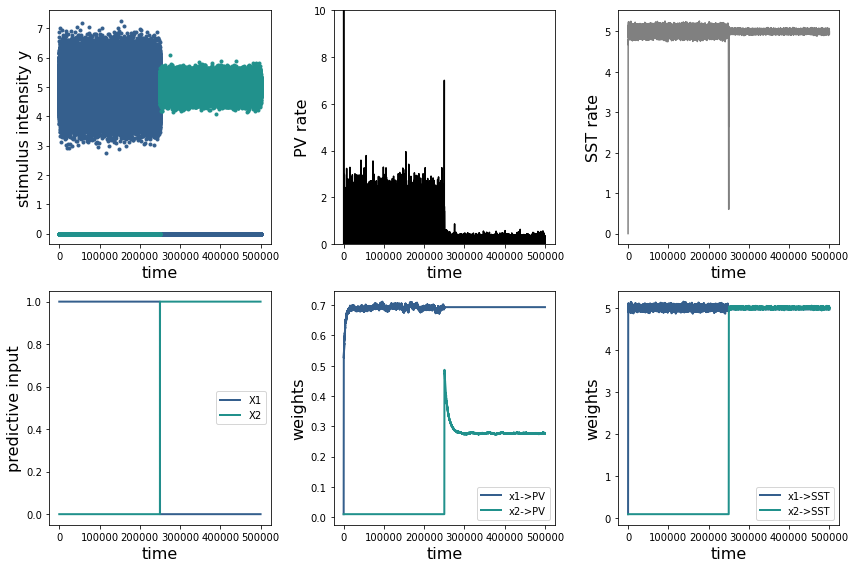

In [10]:
print(np.mean(rP_monitor[100:int(T/2)]))
print(np.mean(rP_monitor[int(T/2)+100:]))

plt.figure(figsize=(12,8))
plt.subplot(231)
plt.plot(rY1,'.',color =cm.viridis(.3))#, label='Y1: mean: %.1f, sigma: %.1f'%(Y1_mean,Y1_sigma))
plt.plot(rY2,'.',color =cm.viridis(.5))#, label='Y2: mean: %.1f, sigma: %.1f'%(Y2_mean,Y2_sigma))
plt.ylabel('stimulus intensity y',fontsize=16)
plt.xlabel('time',fontsize=16)
#plt.legend(loc='lower right')
plt.subplot(234)
plt.plot(rX1, label='X1', color =cm.viridis(.3),linewidth=2)
plt.plot(rX2, label='X2',color =cm.viridis(.5),linewidth=2)
plt.ylabel('predictive input',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.legend(loc='center right')
plt.subplot(232)
plt.plot(rP_monitor, color = 'k')#,
         #label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])))
plt.ylabel('PV rate',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylim(0,10)
#plt.xlim(1000,2000)
#plt.legend(loc='lower right')
plt.subplot(233)
plt.plot(rS_monitor, color = 'gray')#,
         #label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rS_monitor[100:int(T/2)]),np.mean(rS_monitor[int(T/2)+100:])))
plt.ylabel('SST rate',fontsize=16)
plt.xlabel('time',fontsize=16)
#plt.legend(loc = 'lower right')
plt.subplot(235)
plt.plot(wPX1_monitor, label='x1->PV', color =cm.viridis(.3),linewidth=2)
plt.plot(wPX2_monitor, label='x2->PV',color =cm.viridis(.5),linewidth=2)
plt.ylabel('weights',fontsize=16)
plt.xlabel('time',fontsize=16)
#plt.ylim(0,1)
plt.legend(loc='lower right')
plt.subplot(236)
plt.plot(wSX1_monitor, label='x1->SST', color =cm.viridis(.3),linewidth=2)
plt.plot(wSX2_monitor, label='x2->SST',color =cm.viridis(.5),linewidth=2)
plt.ylabel('weights',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./learning_weights_Gauss.pdf', bbox_inches='tight',rasterized=True)

0.00829160589519799
0.0013612269378558335


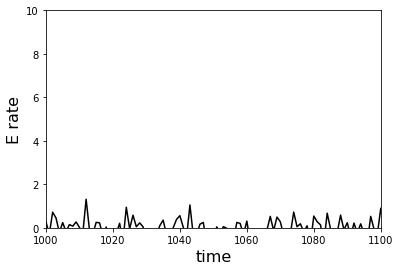

In [11]:
plt.plot(rE_monitor, color = 'k')#,
         #label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])))
plt.ylabel('E rate',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylim(0,10)
plt.xlim(1000,1100)
print(np.mean(rE_monitor[100:int(T/2)]))
print(np.mean(rE_monitor[int(T/2)+100:]))

[0.         0.5288789  0.59560844 ... 4.97529029 4.97178971 4.98831762]
[0.         6.98160876 6.25006016 ... 0.02166787 0.02065985 0.06511943]


<ipython-input-14-c584c8ad8c9e>:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./rates_and_weights_Gauss_afterlearning.pdf', bbox_inches='tight',rasterized=True)
<ipython-input-14-c584c8ad8c9e>:79: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./E_PV_SST_rates_Gauss_afterlearning.pdf', bbox_inches='tight',rasterized=True)


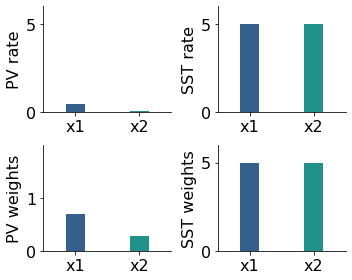

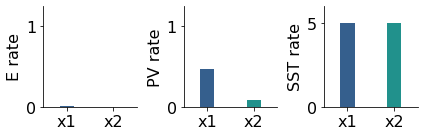

In [14]:

plt.figure(figsize=(5,4))

a1 = plt.subplot(221)
plt.bar([0,1],[np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(222)
plt.bar([0,1],[np.mean(rS_monitor[100:int(T/2)]),np.mean(rS_monitor[int(T/2)+100:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
a3 = plt.subplot(223)
plt.bar([0,1],[wPX1_monitor[-1],wPX2_monitor[-1]],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,2)
plt.xlim(-0.5,1.5)
plt.yticks([0,1],[0,1],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('PV weights',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

a4 = plt.subplot(224)
plt.bar([0,1],[wSX1_monitor[-1],wSX2_monitor[-1]],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a4.spines['top'].set_visible(False)
a4.spines['right'].set_visible(False)
plt.ylabel('SST weights',fontsize=16)
#plt.xlabel('time')
plt.tight_layout()
print(rS_monitor)
print(rP_monitor)
plt.savefig('./rates_and_weights_Gauss_afterlearning.pdf', bbox_inches='tight',rasterized=True)


plt.figure(figsize=(6,2))

a1 = plt.subplot(131)
plt.bar([0,1],[np.mean(rE_monitor[100:int(T/2)]),np.mean(rE_monitor[int(T/2)+100:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('E rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,1],[0,1],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,1.25)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(132)
plt.bar([0,1],[np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,1],[0,1],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylim(0,1.25)
plt.xlim(-0.5,1.5)
a3 = plt.subplot(133)
plt.bar([0,1],[np.mean(rS_monitor[100:int(T/2)]),np.mean(rS_monitor[int(T/2)+100:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

plt.tight_layout()

plt.savefig('./E_PV_SST_rates_Gauss_afterlearning.pdf', bbox_inches='tight',rasterized=True)

(0.0, 100000.0)

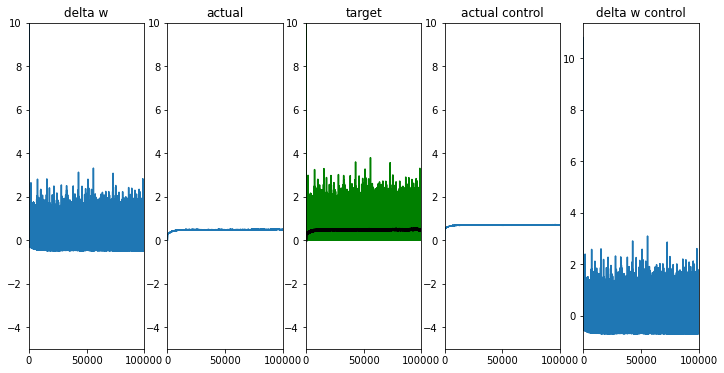

In [15]:
start = 0 
end = 100000
mini = -5
maxi = 10
plt.figure(figsize=(12,6))
plt.subplot(151)
plt.title('delta w')
plt.plot(deltaw_monitor)
plt.xlim(start,end)
plt.ylim(mini,maxi)
plt.subplot(152)
plt.title('actual')
plt.plot(actual)
plt.xlim(start,end)
plt.ylim(mini,maxi)
plt.subplot(153)
plt.title('target')
plt.plot(target,color='g')
plt.plot(actual,lw=3,color='k')
plt.xlim(start,end)
plt.ylim(mini,maxi)
plt.subplot(154)
plt.title('actual control')
plt.plot(actual_control)
plt.xlim(start,end)
plt.ylim(mini,maxi)
plt.subplot(155)
plt.title('delta w control')
plt.plot(deltawcontrol_monitor)
plt.xlim(start,end)


## No plasticity and no Y, look at how X drives E, PV and SST

In [16]:
T = 100000
T2=100
rX1 = np.zeros((T2))
rX2 = np.zeros((T2))
rX1[:int(T2/2)] = 1
rX2[int(T2/2):] = 1
rP = 0.0
rS = 0.0
rE = 0.0
tau_E = 1.0
beta_S = 0.1 
beta_P = 0.1


wEP = np.array([1.0])
wES = np.array([-1.0])
wEY1 = np.array([1.0])
wEY2 = np.array([1.0])

Y1_new_mean = Y1_mean + 2.0
Y2_new_mean = Y2_mean + 2.0
#Y1_sigma = 0.5
#Y2_sigma = 0.1
#Y3_sigma = 1.0

#rY1 = Y1_sigma*np.random.randn(T)+Y1_mean
rY1n = np.ones((T))*Y1_new_mean
rY1n[int(T2/2):] = 0
rY2n = np.ones((T))*Y2_new_mean
#rY2 = Y2_sigma*np.random.randn(T)+Y2_mean
rY2n[:int(T2/2)] = 0

rP_monitor = np.empty((T2))
rE_monitor = np.empty((T2))

IP_monitor = np.empty((T2))
wPX1_monitor = np.empty((T2))
wPX2_monitor = np.empty((T2))

rS_monitor = np.empty((T2))
IS_monitor = np.empty((T2))
wSX1_monitor = np.empty((T2))
wSX2_monitor = np.empty((T2))
#wPB * rB[t]

#wPX1 = wPX1*10
#wPX2 = wPX2*10

for t in range(T2):
    #beta_S = (T*1.0-t)/T
    #beta_P = (T*1.0-t)/T
    drS = (-rS + (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1n[t] + wSY2 * rY2n[t]))/tau_S
    #drS = (-rS + wSX1 * rX1[t] + wSX2 * rX2[t])/tau_S
    drP = (-rP + phi_square((1-beta_P)*(wPX1 * rX1[t] + wPX2 * rX2[t]) + beta_P*(wPY1 * rY1n[t] + wPY2 * rY2n[t] + wPS * rS)))/tau_P
    #drP = (-rP + phi_square(wPX1 * rX1[t] + wPX2 * rX2[t] + wPS * rS))/tau_P
    drE = (-rE + 1.0/(1.0 + wEP * rP) * (wEY1 * rY1n[t] + wEY2 * rY2n[t] + wES * rS))/tau_E
    IS_monitor[t] = (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1[t] + wSY2 * rY2[t])
    rP_monitor[t] = rP
    rS_monitor[t] = rS
    rE_monitor[t] = rE
    wPX1_monitor[t] = wPX1
    wPX2_monitor[t] = wPX2
    wSX1_monitor[t] = wSX1
    wSX2_monitor[t] = wSX2

    rP += dt*drP
    rS += dt*drS
    rE += dt*drE

[0.         5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.18838794 5.18838794 5.18838794
 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794
 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794
 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794
 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794
 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794
 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794 5.1883

<ipython-input-17-0e359fee8961>:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./rates_and_weights_Gauss_mismatch.pdf', bbox_inches='tight',rasterized=True)
<ipython-input-17-0e359fee8961>:79: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./E_PV_SST_rates_Gauss_mismacth.pdf', bbox_inches='tight',rasterized=True)


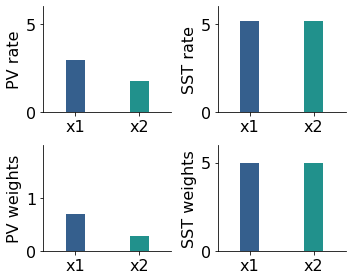

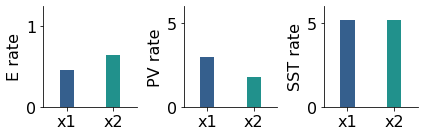

In [17]:

plt.figure(figsize=(5,4))

a1 = plt.subplot(221)
plt.bar([0,1],[np.mean(rP_monitor[5:int(T2/2)]),np.mean(rP_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(222)
plt.bar([0,1],[np.mean(rS_monitor[5:int(T2/2)]),np.mean(rS_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
a3 = plt.subplot(223)
plt.bar([0,1],[wPX1_monitor[-1],wPX2_monitor[-1]],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,2)
plt.xlim(-0.5,1.5)
plt.yticks([0,1],[0,1],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('PV weights',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

a4 = plt.subplot(224)
plt.bar([0,1],[wSX1_monitor[-1],wSX2_monitor[-1]],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a4.spines['top'].set_visible(False)
a4.spines['right'].set_visible(False)
plt.ylabel('SST weights',fontsize=16)
#plt.xlabel('time')
plt.tight_layout()
print(rS_monitor)
print(rP_monitor)
plt.savefig('./rates_and_weights_Gauss_mismatch.pdf', bbox_inches='tight',rasterized=True)


plt.figure(figsize=(6,2))

a1 = plt.subplot(131)
plt.bar([0,1],[np.mean(rE_monitor[5:int(T2/2)]),np.mean(rE_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('E rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,1],[0,1],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,1.25)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(132)
plt.bar([0,1],[np.mean(rP_monitor[5:int(T2/2)]),np.mean(rP_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
a3 = plt.subplot(133)
plt.bar([0,1],[np.mean(rS_monitor[5:int(T2/2)]),np.mean(rS_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

plt.tight_layout()

plt.savefig('./E_PV_SST_rates_Gauss_mismacth.pdf', bbox_inches='tight',rasterized=True)

In [18]:
rE_monitor

array([0.        , 7.        , 0.08724198, 0.46149941, 0.46149941,
       0.46149941, 0.46149941, 0.46149941, 0.46149941, 0.46149941,
       0.46149941, 0.46149941, 0.46149941, 0.46149941, 0.46149941,
       0.46149941, 0.46149941, 0.46149941, 0.46149941, 0.46149941,
       0.46149941, 0.46149941, 0.46149941, 0.46149941, 0.46149941,
       0.46149941, 0.46149941, 0.46149941, 0.46149941, 0.46149941,
       0.46149941, 0.46149941, 0.46149941, 0.46149941, 0.46149941,
       0.46149941, 0.46149941, 0.46149941, 0.46149941, 0.46149941,
       0.46149941, 0.46149941, 0.46149941, 0.46149941, 0.46149941,
       0.46149941, 0.46149941, 0.46149941, 0.46149941, 0.46149941,
       0.46149941, 0.46149941, 0.64351102, 0.65113051, 0.65113051,
       0.65113051, 0.65113051, 0.65113051, 0.65113051, 0.65113051,
       0.65113051, 0.65113051, 0.65113051, 0.65113051, 0.65113051,
       0.65113051, 0.65113051, 0.65113051, 0.65113051, 0.65113051,
       0.65113051, 0.65113051, 0.65113051, 0.65113051, 0.65113

## Discrete inputs

In [19]:
#sim parameters
dt = 1
T = 500000 # number of time steps
tau_P = 1
tau_S = 1

#weights
wPB = np.array([1.0])
wPY1 = np.array([6.0])
wPY2 = np.array([6.0])
wPX1 = np.array([0.01]) # small intitial weights
wPX2 = np.array([0.01]) # small intitial weights
wPS = np.array([-6.0])

wSX1 = np.array([0.1]) # small intitial weights
wSX2 = np.array([0.1]) # small intitial weights
wSY1 = np.array([1.0])
wSY2 = np.array([1.0])


#inputs
rB = np.ones((T))*2.0
rX1 = np.zeros((T))
rX2 = np.zeros((T))
rX1[:int(T/2)] = 1
rX2[int(T/2):] = 1

Y1 = 5.0
#Y2 = [4.0,5.0,6.0]

rY1 = np.ones((T))*Y1
rY1[int(T/2):] = 0
rY2 = np.random.randint(4,7,size=T)
rY2[:int(T/2)] = 0

#learning rate
eta_S = 0.1
eta_P = 0.001

print(rY1)
print(rY2)

[5. 5. 5. ... 0. 0. 0.]
[0 0 0 ... 6 4 4]


In [20]:
rP = 0.0#phi_square(rB[0])
rS = 0.0
beta_S = 0.1 
beta_P = 0.1

rP_monitor = np.empty((T))
wPX1_monitor = np.empty((T))
wPX2_monitor = np.empty((T))

rS_monitor = np.empty((T))
IS_monitor = np.empty((T))
IP_monitor = np.empty((T))
X_in_monitor = np.empty((T))
Y_in_monitor = np.empty((T))
S_in_monitor = np.empty((T))
YS_in_monitor = np.empty((T))

wSX1_monitor = np.empty((T))
wSX2_monitor = np.empty((T))
deltaw_monitor = np.empty((T))
deltawcontrol_monitor = np.empty((T))

actual = np.empty((T))
actual_control = np.empty((T))

target = np.empty((T))

#wPB * rB[t]

for t in range(T):
    #beta_S = (T*1.0-t)/T
    #beta_P = (T*1.0-t)/T
    #beta_P = (T-(t%int(T/2)))/T

    drS = (-rS + (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1[t] + wSY2 * rY2[t]))/tau_S
    #drS = (-rS + wSX1 * rX1[t] + wSX2 * rX2[t] + wSY1 * rY1[t] + wSY2 * rY2[t])/tau_S
    drP = (-rP + phi_square(((1-beta_P)*(wPX1 * rX1[t] + wPX2 * rX2[t]) + beta_P*(wPY1 * rY1[t] + wPY2 * rY2[t] + wPS * rS))))/tau_P
    #drP = (-rP + phi(wPX1 * rX1[t] + wPX2 * rX2[t] + wPY1 * rY1[t] + wPY2 * rY2[t] + wPS * rS))/tau_P

    #IS_monitor[t] = (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1[t] + wSY2 * rY2[t])
    IP_monitor[t] = phi_square((1-beta_P)*(wPX1 * rX1[t] + wPX2 * rX2[t]) + beta_P*(wPY1 * rY1[t] + wPY2 * rY2[t] + wPS * rS))
    #X_in_monitor[t] = wPX1 * rX1[t] + wPX2 * rX2[t]
    #Y_in_monitor[t] = wPY1 * rY1[t] + wPY2 * rY2[t]
    #S_in_monitor[t] = wPS * rS
    #YS_in_monitor[t] = wPY1 * rY1[t] + wPY2 * rY2[t] + wPS * rS
    rP_monitor[t] = rP
    rS_monitor[t] = rS
    wPX1_monitor[t] = wPX1
    wPX2_monitor[t] = wPX2
    wSX1_monitor[t] = wSX1
    wSX2_monitor[t] = wSX2

    rP += dt*drP
    rS += dt*drS
    #if t>100:
    actual[t] = (wPX1*rX1[t])**2
    actual_control[t] = (wPX1*rX1[t])

    target[t] = rP 
    deltaw_monitor[t] = ((rP - ((wPX1*rX1[t])**2)) * rX1[t])
    deltawcontrol_monitor[t] = ((rP - ((wPX1*rX1[t]))) * rX1[t])

    wPX1 += eta_P * ((rP - ((wPX1*rX1[t])**2)) * rX1[t])
    wPX2 += eta_P * ((rP - ((wPX2*rX2[t])**2)) * rX2[t])
    wSX1 += eta_S * ((rS - (wSX1*rX1[t])) * rX1[t])
    wSX2 += eta_S * ((rS - (wSX2*rX2[t])) * rX2[t])

0.008934440241261565
1.2680779254908268


<ipython-input-21-02c8f93f7cab>:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./learning_weights_discrete.pdf', bbox_inches='tight',rasterized=True)


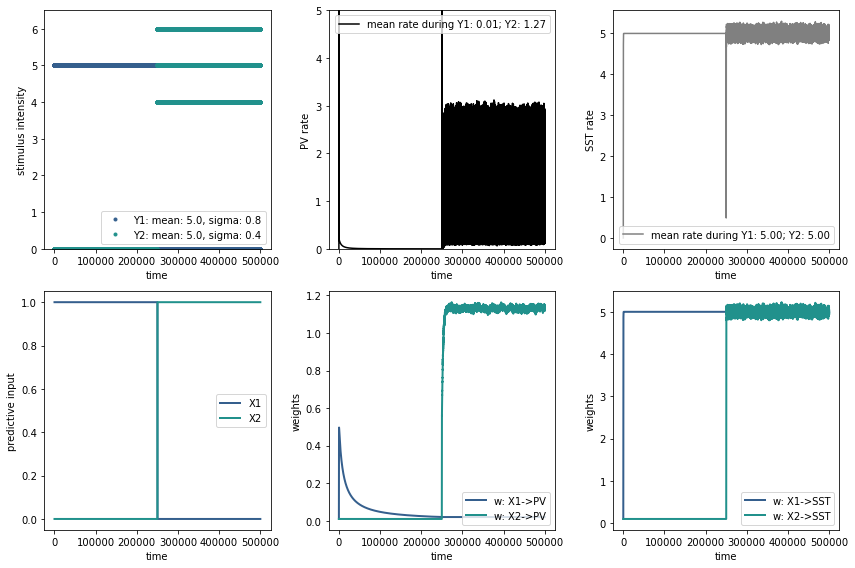

In [21]:
print(np.mean(rP_monitor[100:int(T/2)]))
print(np.mean(rP_monitor[int(T/2)+100:]))

plt.figure(figsize=(12,8))
plt.subplot(231)
plt.plot(rY1,'.', label='Y1: mean: %.1f, sigma: %.1f'%(Y1_mean,Y1_sigma), color =cm.viridis(.3))
plt.plot(rY2,'.', label='Y2: mean: %.1f, sigma: %.1f'%(Y2_mean,Y2_sigma), color =cm.viridis(.5))
plt.ylim(0,6.5)
plt.ylabel('stimulus intensity')
plt.xlabel('time')
plt.legend(loc='lower right')
plt.subplot(234)
plt.plot(rX1, label='X1', color =cm.viridis(.3),linewidth=2)
plt.plot(rX2, label='X2',color =cm.viridis(.5),linewidth=2)
plt.ylabel('predictive input')
plt.xlabel('time')
plt.legend(loc='center right')
plt.subplot(232)
plt.plot(rP_monitor, color = 'k',
         label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])))
plt.ylabel('PV rate')
plt.xlabel('time')
plt.ylim(0,5)
#plt.xlim(1000,2000)
plt.legend(loc='upper right')
plt.subplot(233)
plt.plot(rS_monitor, color = 'gray',
         label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rS_monitor[100:int(T/2)]),np.mean(rS_monitor[int(T/2)+100:])))
plt.ylabel('SST rate')
plt.xlabel('time')
plt.legend(loc = 'lower right')
plt.subplot(235)
plt.plot(wPX1_monitor, label='w: X1->PV', color =cm.viridis(.3),linewidth=2)
plt.plot(wPX2_monitor, label='w: X2->PV',color =cm.viridis(.5),linewidth=2)
plt.ylabel('weights')
plt.xlabel('time')
#plt.ylim(0,1)
plt.legend(loc='lower right')
plt.subplot(236)
plt.plot(wSX1_monitor, label='w: X1->SST', color =cm.viridis(.3),linewidth=2)
plt.plot(wSX2_monitor, label='w: X2->SST',color =cm.viridis(.5),linewidth=2)
plt.ylabel('weights')
plt.xlabel('time')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./learning_weights_discrete.pdf', bbox_inches='tight',rasterized=True)

In [22]:
T2=100
rX1 = np.zeros((T2))
rX2 = np.zeros((T2))
rX1[:int(T2/2)] = 1
rX2[int(T2/2):] = 1
rP = 0.0
rS = 0.0
rE = 0.0
tau_E = 1.0


wEP = np.array([1.0])
wES = np.array([-1.0])
wEY1 = np.array([1.0])
wEY2 = np.array([1.0])

Y1n = Y1+2.0
#Y2 = [4.0,5.0,6.0]

rY1n = np.ones((T2))*Y1n
rY1n[int(T2/2):] = 0
rY2n = np.ones((T2))*Y1n
rY2n[:int(T2/2)] = 0

rP_monitor = np.empty((T2))
rE_monitor = np.empty((T2))

IP_monitor = np.empty((T2))
wPX1_monitor = np.empty((T2))
wPX2_monitor = np.empty((T2))

rS_monitor = np.empty((T2))
IS_monitor = np.empty((T2))
wSX1_monitor = np.empty((T2))
wSX2_monitor = np.empty((T2))
XtoP = np.empty((T2))
YtoP = np.empty((T2))
StoP = np.empty((T2))

#wPB * rB[t]

#wPX1 = wPX1*10
#wPX2 = wPX2*10

for t in range(T2):
    #beta_S = (T*1.0-t)/T
    #beta_P = (T*1.0-t)/T
    drS = (-rS + (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1n[t] + wSY2 * rY2n[t]))/tau_S
    #drS = (-rS + wSX1 * rX1[t] + wSX2 * rX2[t])/tau_S
    drP = (-rP + phi_square((1-beta_P)*(wPX1 * rX1[t] + wPX2 * rX2[t]) + beta_P*(wPY1 * rY1n[t] + wPY2 * rY2n[t] + wPS * rS)))/tau_P
    #drP = (-rP + phi_square(wPX1 * rX1[t] + wPX2 * rX2[t] + wPS * rS))/tau_P
    drE = (-rE + 1.0/(1.0 + wEP * rP) * (wEY1 * rY1n[t] + wEY2 * rY2n[t] + wES * rS))/tau_E
    IS_monitor[t] = (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1[t] + wSY2 * rY2[t])
    rP_monitor[t] = rP
    rS_monitor[t] = rS
    rE_monitor[t] = rE
    XtoP[t] = (1-beta_P)*(wPX1 * rX1[t] + wPX2 * rX2[t])
    StoP[t] = beta_P*(wPS * rS)
    YtoP[t] = beta_P*(wPY1 * rY1n[t] + wPY2 * rY2n[t])

    wPX1_monitor[t] = wPX1
    wPX2_monitor[t] = wPX2
    wSX1_monitor[t] = wSX1
    wSX2_monitor[t] = wSX2

    rP += dt*drP
    rS += dt*drS
    rE += dt*drE

[0.         5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.1581

<ipython-input-23-6ea9fb988175>:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./rates_and_weights_discrete.eps', bbox_inches='tight',rasterized=True)
<ipython-input-23-6ea9fb988175>:79: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./E_PV_SST_rates_discrete.pdf', bbox_inches='tight',rasterized=True)


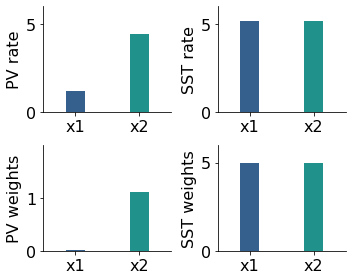

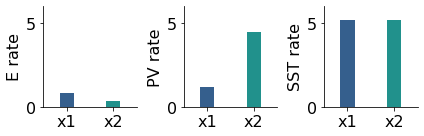

In [23]:
plt.figure(figsize=(5,4))

a1 = plt.subplot(221)
plt.bar([0,1],[np.mean(rP_monitor[5:int(T2/2)]),np.mean(rP_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(222)
plt.bar([0,1],[np.mean(rS_monitor[5:int(T2/2)]),np.mean(rS_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
a3 = plt.subplot(223)
plt.bar([0,1],[wPX1_monitor[-1],wPX2_monitor[-1]],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,2)
plt.xlim(-0.5,1.5)
plt.yticks([0,1],[0,1],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('PV weights',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

a4 = plt.subplot(224)
plt.bar([0,1],[wSX1_monitor[-1],wSX2_monitor[-1]],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a4.spines['top'].set_visible(False)
a4.spines['right'].set_visible(False)
plt.ylabel('SST weights',fontsize=16)
#plt.xlabel('time')
plt.tight_layout()
print(rS_monitor)
print(rP_monitor)
plt.savefig('./rates_and_weights_discrete.eps', bbox_inches='tight',rasterized=True)


plt.figure(figsize=(6,2))

a1 = plt.subplot(131)
plt.bar([0,1],[np.mean(rE_monitor[5:int(T2/2)]),np.mean(rE_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('E rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(132)
plt.bar([0,1],[np.mean(rP_monitor[5:int(T2/2)]),np.mean(rP_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
a3 = plt.subplot(133)
plt.bar([0,1],[np.mean(rS_monitor[5:int(T2/2)]),np.mean(rS_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

plt.tight_layout()

plt.savefig('./E_PV_SST_rates_discrete.pdf', bbox_inches='tight',rasterized=True)

In [24]:
def run_sweep(param_name, value_range):
    params = {'mean': 5.0,
             'sigma': 0.5,
             'wP': 6.0}
    PV_rates = np.empty((len(value_range)))
    SST_rates = np.empty((len(value_range)))
    E_rates = np.empty((len(value_range)))
    PV_std = np.empty((len(value_range)))
    SST_std = np.empty((len(value_range)))
    E_std = np.empty((len(value_range)))
    
    for k, param_value in enumerate(value_range):
        
        params[param_name] = param_value
        #sim parameters
        dt = 1
        T = 100000 # number of time steps

        # time constants
        tau_P = 1
        tau_S = 1
        tau_E = 1.0

        # weights
        # to PV
        wPB = np.array([1.0])
        wPY1 = np.array([params['wP']])
        wPX1 = np.array([0.01]) # small intitial weights
        wPS = np.array([-params['wP']])

        # to SST
        wSX1 = np.array([0.1]) # small intitial weights
        wSY1 = np.array([1.0])

        # to E
        wEP = np.array([1.0])
        wES = np.array([-1.0])
        wEY1 = np.array([1.0])
        wEY2 = np.array([1.0])

        # nudging parameter
        beta_S = 0.1 
        beta_P = 0.1


        # inputs
        # sound
        rX1 = np.ones((T))

        # whisker
        Y1_mean = params['mean']
        Y1_sigma = params['sigma']

        rY1 = Y1_sigma*np.random.randn(T)+Y1_mean

        #learning rate
        eta_S = 0.1
        eta_P = 0.001

        #initial rates
        rP = 0.0#phi_square(rB[0])
        rS = 0.0
        rE = 0.0

        # monitors
        rP_monitor = np.empty((T))
        rE_monitor = np.empty((T))
        rS_monitor = np.empty((T))

        wPX1_monitor = np.empty((T))
        wSX1_monitor = np.empty((T))


        for t in range(T):

            drS = (-rS + (1-beta_S)*(wSX1 * rX1[t]) + beta_S*(wSY1 * rY1[t]))/tau_S
            drP = (-rP + phi_square(((1-beta_P)*(wPX1 * rX1[t]) + beta_P*(wPY1 * rY1[t] + wPS * rS))))/tau_P
            drE = (-rE + 1.0/(1.0 + wEP * rP) * (wEY1 * rY1[t] + wES * rS))/tau_E

            # store monitors
            rP_monitor[t] = rP
            rS_monitor[t] = rS
            rE_monitor[t] = rE
            wPX1_monitor[t] = wPX1
            wSX1_monitor[t] = wSX1


            # rate changes
            rP += dt*drP
            rS += dt*drS
            rE += dt*drE

            # weight changes
            wPX1 += eta_P * ((rP - ((wPX1*rX1[t])**2)) * rX1[t])
            wSX1 += eta_S * ((rS - (wSX1*rX1[t])) * rX1[t])

        PV_rates[k] = np.mean(rP_monitor[100:])
        SST_rates[k] = np.mean(rS_monitor[100:])
        E_rates[k] = np.mean(rE_monitor[100:])
        PV_std[k] = np.std(rP_monitor[100:])
        SST_std[k] = np.std(rS_monitor[100:])
        E_std[k] = np.std(rE_monitor[100:])
        
    return E_rates, SST_rates, PV_rates, E_std, SST_std, PV_std



In [25]:
sigma_range= np.arange(0.0,1.1,0.1)
mean_range= np.arange(0.0,5.1,1.0)
wP_range= np.arange(1.0,10.1,1.0)
E_rates_mean, SST_rates_mean, PV_rates_mean, E_std_mean, SST_std_mean, PV_std_mean = run_sweep('mean',mean_range)
E_rates_sigma, SST_rates_sigma, PV_rates_sigma, E_std_sigma, SST_std_sigma, PV_std_sigma = run_sweep('sigma',sigma_range)


In [26]:
sigma_range= np.arange(0.0,1.1,0.1)
mean_range= np.arange(0.0,5.1,1.0)
wP_range= np.arange(1.0,10.1,1.0)

#PV_rates = np.empty((len(sigma_range)))
#SST_rates = np.empty((len(sigma_range)))
#E_rates = np.empty((len(sigma_range)))

#PV_rates = np.empty((len(mean_range)))
#SST_rates = np.empty((len(mean_range)))
#E_rates = np.empty((len(mean_range)))

PV_rates = np.empty((len(wP_range)))
SST_rates = np.empty((len(wP_range)))
E_rates = np.empty((len(wP_range)))


wP = 6.0
mean= 5.0
sigma= 0.5
#for k, sigma in enumerate(sigma_range):
#for k, mean in enumerate(mean_range):
for k, wP in enumerate(wP_range):
    #sim parameters
    dt = 1
    T = 100000 # number of time steps

    # time constants
    tau_P = 1
    tau_S = 1
    tau_E = 1.0

    # weights
    # to PV
    wPB = np.array([1.0])
    wPY1 = np.array([wP])
    wPX1 = np.array([0.01]) # small intitial weights
    wPS = np.array([-wP])

    # to SST
    wSX1 = np.array([0.1]) # small intitial weights
    wSY1 = np.array([1.0])

    # to E
    wEP = np.array([1.0])
    wES = np.array([-1.0])
    wEY1 = np.array([1.0])
    wEY2 = np.array([1.0])

    # nudging parameter
    beta_S = 0.1 
    beta_P = 0.1


    # inputs
    # sound
    rX1 = np.ones((T))

    # whisker
    Y1_mean = mean
    Y1_sigma = sigma

    rY1 = Y1_sigma*np.random.randn(T)+Y1_mean

    #learning rate
    eta_S = 0.1
    eta_P = 0.001

    #initial rates
    rP = 0.0#phi_square(rB[0])
    rS = 0.0
    rE = 0.0

    # monitors
    rP_monitor = np.empty((T))
    rE_monitor = np.empty((T))
    rS_monitor = np.empty((T))

    wPX1_monitor = np.empty((T))
    wSX1_monitor = np.empty((T))


    for t in range(T):

        drS = (-rS + (1-beta_S)*(wSX1 * rX1[t]) + beta_S*(wSY1 * rY1[t]))/tau_S
        drP = (-rP + phi_square(((1-beta_P)*(wPX1 * rX1[t]) + beta_P*(wPY1 * rY1[t] + wPS * rS))))/tau_P
        drE = (-rE + 1.0/(1.0 + wEP * rP) * (wEY1 * rY1[t] + wES * rS))/tau_E

        # store monitors
        rP_monitor[t] = rP
        rS_monitor[t] = rS
        rE_monitor[t] = rE
        wPX1_monitor[t] = wPX1
        wSX1_monitor[t] = wSX1


        # rate changes
        rP += dt*drP
        rS += dt*drS
        rE += dt*drE

        # weight changes
        wPX1 += eta_P * ((rP - ((wPX1*rX1[t])**2)) * rX1[t])
        wSX1 += eta_S * ((rS - (wSX1*rX1[t])) * rX1[t])
    
    PV_rates[k] = np.mean(rP_monitor[100:])
    SST_rates[k] = np.mean(rS_monitor[100:])
    E_rates[k] = np.mean(rE_monitor[100:])
    


<ipython-input-27-aad618cdb478>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./SST_asfctof_wP.pdf', bbox_inches='tight',rasterized=True)
<ipython-input-27-aad618cdb478>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./E_asfctof_wP.pdf', bbox_inches='tight',rasterized=True)
<ipython-input-27-aad618cdb478>:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./PV_asfctof_wP.pdf', bbox_inches='tight',rasterized=True)


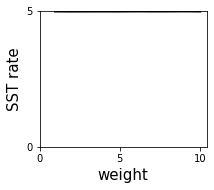

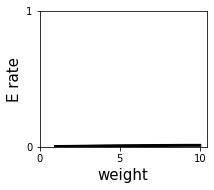

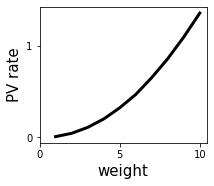

In [27]:
plt.figure(figsize=(3,2.5))
plt.plot(wP_range,SST_rates, color = 'k',linewidth=3)
plt.xlabel('weight',fontsize=15)
plt.ylabel('SST rate',fontsize=15)
plt.xticks([0,5,10],[0,5,10])
plt.yticks([0,5],[0,5])
plt.savefig('./SST_asfctof_wP.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(wP_range,E_rates, color = 'k',linewidth=3)
plt.xlabel('weight',fontsize=15)
plt.ylabel('E rate',fontsize=15)
plt.xticks([0,5,10],[0,5,10])
plt.yticks([0,1],[0,1])
plt.savefig('./E_asfctof_wP.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(wP_range,PV_rates, color = 'k',linewidth=3)
plt.xlabel('weight',fontsize=15)
plt.ylabel('PV rate',fontsize=15)
plt.xticks([0,5,10],[0,5,10])
plt.yticks([0,1],[0,1])
plt.savefig('./PV_asfctof_wP.pdf', bbox_inches='tight',rasterized=True)

<ipython-input-28-f33626cd3c5b>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./SST_asfctof_mean.pdf', bbox_inches='tight',rasterized=True)
<ipython-input-28-f33626cd3c5b>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./E_asfctof_mean.pdf', bbox_inches='tight',rasterized=True)
<ipython-input-28-f33626cd3c5b>:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./PV_asfctof_mean.pdf', bbox_inches='tight',rasterized=True)


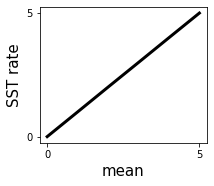

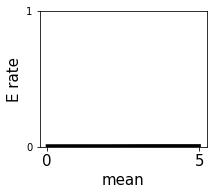

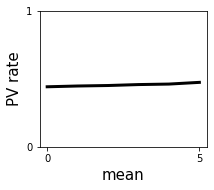

In [28]:
plt.figure(figsize=(3,2.5))
plt.plot(mean_range,SST_rates_mean, color = 'k',linewidth=3)
plt.xlabel('mean',fontsize=15)
plt.ylabel('SST rate',fontsize=15)
plt.xticks([0,5],[0,5])
plt.yticks([0,5],[0,5])
plt.savefig('./SST_asfctof_mean.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(mean_range,E_rates_mean, color = 'k',linewidth=3)
plt.xlabel('mean',fontsize=15)
plt.ylabel('E rate',fontsize=15)
plt.xticks([0,5],[0,5],fontsize=15)
plt.yticks([0,1],[0,1])
plt.savefig('./E_asfctof_mean.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(mean_range,PV_rates_mean, color = 'k',linewidth=3)
plt.xlabel('mean',fontsize=15)
plt.ylabel('PV rate',fontsize=15)
plt.xticks([0,5],[0,5])
plt.yticks([0,1],[0,1])
plt.savefig('./PV_asfctof_mean.pdf', bbox_inches='tight',rasterized=True)

ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

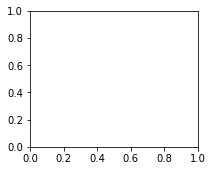

In [29]:
plt.figure(figsize=(3,2.5))
plt.plot(sigma_range**2,SST_rates, color = 'k',linewidth=3)
plt.xlabel('sigma^2',fontsize=15)
plt.ylabel('SST rate',fontsize=15)
plt.xticks([0.0,0.5,1.0],[0.0,0.5,1.0])
plt.yticks([0,5],[0,5])
plt.ylim(0,6)
plt.savefig('./SST_asfctof_sigma2.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(sigma_range**2,E_rates, color = 'k',linewidth=3)
plt.xlabel('sigma^2',fontsize=15)
plt.ylabel('E rate',fontsize=15)
plt.xticks([0.0,0.5,1.0],[0.0,0.5,1.0])
plt.yticks([0,1],[0,1])
plt.savefig('./E_asfctof_sigma2.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(sigma_range,PV_rates, color = 'k',linewidth=3)
plt.xlabel('sigma',fontsize=15)
plt.ylabel('PV rate',fontsize=15)
plt.xticks([0.0,0.5,1.0],[0.0,0.5,1.0])
plt.yticks([0,1],[0,1])
plt.savefig('./PV_asfctof_sigma.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(sigma_range**2,PV_rates, color = 'k',linewidth=3)
plt.xlabel('sigma^2',fontsize=15)
plt.ylabel('PV rate',fontsize=15)
plt.xticks([0.0,0.5,1.0],[0.0,0.5,1.0])
plt.yticks([0,1],[0,1])
plt.savefig('./PV_asfctof_sigma2.pdf', bbox_inches='tight',rasterized=True)


1.3772159803752886
1.3324543398391244


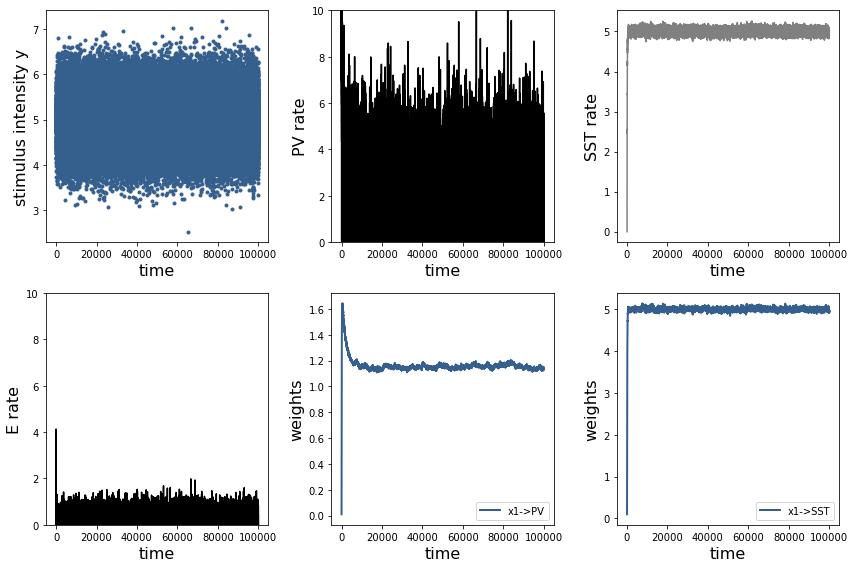

In [30]:
print(np.mean(rP_monitor[100:int(T/2)]))
print(np.mean(rP_monitor[int(T/2)+100:]))

plt.figure(figsize=(12,8))
plt.subplot(231)
plt.plot(rY1,'.',color =cm.viridis(.3))#, label='Y1: mean: %.1f, sigma: %.1f'%(Y1_mean,Y1_sigma))
#plt.plot(rY2,'.',color =cm.viridis(.5))#, label='Y2: mean: %.1f, sigma: %.1f'%(Y2_mean,Y2_sigma))
plt.ylabel('stimulus intensity y',fontsize=16)
plt.xlabel('time',fontsize=16)
#plt.legend(loc='lower right')
plt.subplot(234)
plt.plot(rE_monitor, color = 'k')#,
         #label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])))
plt.ylabel('E rate',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylim(0,10)
plt.subplot(232)
plt.plot(rP_monitor, color = 'k')#,
         #label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])))
plt.ylabel('PV rate',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylim(0,10)
#plt.xlim(1000,2000)
#plt.legend(loc='lower right')
plt.subplot(233)
plt.plot(rS_monitor, color = 'gray')#,
         #label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rS_monitor[100:int(T/2)]),np.mean(rS_monitor[int(T/2)+100:])))
plt.ylabel('SST rate',fontsize=16)
plt.xlabel('time',fontsize=16)
#plt.legend(loc = 'lower right')
plt.subplot(235)
plt.plot(wPX1_monitor, label='x1->PV', color =cm.viridis(.3),linewidth=2)
#plt.plot(wPX2_monitor, label='x2->PV',color =cm.viridis(.5),linewidth=2)
plt.ylabel('weights',fontsize=16)
plt.xlabel('time',fontsize=16)
#plt.ylim(0,1)
plt.legend(loc='lower right')
plt.subplot(236)
plt.plot(wSX1_monitor, label='x1->SST', color =cm.viridis(.3),linewidth=2)
#plt.plot(wSX2_monitor, label='x2->SST',color =cm.viridis(.5),linewidth=2)
plt.ylabel('weights',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.legend(loc='lower right')
plt.tight_layout()


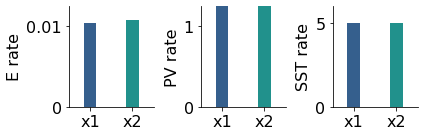

In [31]:
plt.figure(figsize=(6,2))

a1 = plt.subplot(131)
plt.bar([0,1],[np.mean(rE_monitor[100:int(T/2)]),np.mean(rE_monitor[int(T/2)+100:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('E rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,0.01],[0,0.01],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,0.0125)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(132)
plt.bar([0,1],[np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,1],[0,1],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylim(0,1.25)
plt.xlim(-0.5,1.5)
a3 = plt.subplot(133)
plt.bar([0,1],[np.mean(rS_monitor[100:int(T/2)]),np.mean(rS_monitor[int(T/2)+100:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

plt.tight_layout()


In [32]:
def run_network(mean= 5.0, sigma= 0.5, wP= 6.0):
    #sim parameters
    dt = 1
    T = 100000 # number of time steps

    # time constants
    tau_P = 1
    tau_S = 1
    tau_E = 1.0

    # weights
    # to PV
    wPB = np.array([1.0])
    wPY1 = np.array([wP])
    wPX1 = np.array([0.01]) # small intitial weights
    wPS = np.array([-wP])

    # to SST
    wSX1 = np.array([0.1]) # small intitial weights
    wSY1 = np.array([1.0])

    # to E
    wEP = np.array([1.0])
    wES = np.array([-1.0])
    wEY1 = np.array([1.0])
    wEY2 = np.array([1.0])

    # nudging parameter
    beta_S = 0.1 
    beta_P = 0.1


    # inputs
    # sound
    rX1 = np.ones((T))

    # whisker
    Y1_mean = mean
    Y1_sigma = sigma

    rY1 = Y1_sigma*np.random.randn(T)+Y1_mean

    #learning rate
    eta_S = 0.1
    eta_P = 0.001

    #initial rates
    rP = 0.0#phi_square(rB[0])
    rS = 0.0
    rE = 0.0

    # monitors
    rP_monitor = np.empty((T))
    rE_monitor = np.empty((T))
    rS_monitor = np.empty((T))

    wPX1_monitor = np.empty((T))
    wSX1_monitor = np.empty((T))


    for t in range(T):

        drS = (-rS + (1-beta_S)*(wSX1 * rX1[t]) + beta_S*(wSY1 * rY1[t]))/tau_S
        drP = (-rP + phi_square(((1-beta_P)*(wPX1 * rX1[t]) + beta_P*(wPY1 * rY1[t] + wPS * rS))))/tau_P
        drE = (-rE + 1.0/(1.0 + wEP * rP) * (wEY1 * rY1[t] + wES * rS))/tau_E

        # store monitors
        rP_monitor[t] = rP
        rS_monitor[t] = rS
        rE_monitor[t] = rE
        wPX1_monitor[t] = wPX1
        wSX1_monitor[t] = wSX1


        # rate changes
        rP += dt*drP
        rS += dt*drS
        rE += dt*drE

        # weight changes
        wPX1 += eta_P * ((rP - ((wPX1*rX1[t])**2)) * rX1[t])
        wSX1 += eta_S * ((rS - (wSX1*rX1[t])) * rX1[t])
    
    PV_rates = np.mean(rP_monitor[100:])
    SST_rates = np.mean(rS_monitor[100:])
    E_rates = np.mean(rE_monitor[100:])
    
    return E_rates, PV_rates, SST_rates, wPX1_monitor, wSX1_monitor, rY1
    

In [33]:
Y1_mean = 5.0
Y2_mean = 5.0
Y1_sigma = 0.8
Y2_sigma = 0.4
E_rates1, PV_rates1, SST_rates1, wPX1_monitor, wSX1_monitor, rY1 = run_network(mean= Y1_mean,sigma=Y1_sigma)
E_rates2, PV_rates2, SST_rates2, wPX2_monitor, wSX2_monitor, rY2 = run_network(mean= Y2_mean,sigma=Y2_sigma)

<ipython-input-34-bafd00d6aeb4>:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./results.pdf', bbox_inches='tight',rasterized=True)


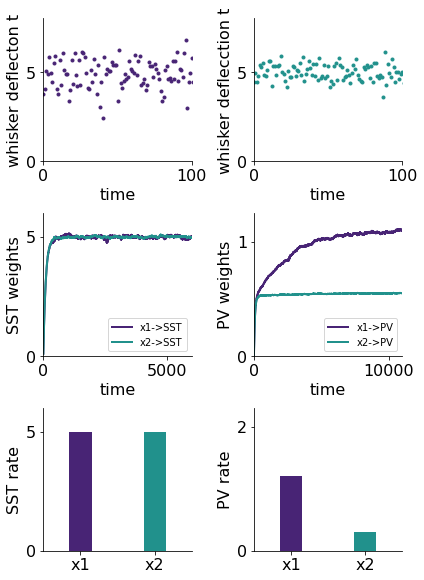

In [34]:
plt.figure(figsize=(6,8))
a0 = plt.subplot(321)
plt.plot(rY1,'.',color =cm.viridis(.1))#, label='Y1: mean: %.1f, sigma: %.1f'%(Y1_mean,Y1_sigma))
#plt.axhline(y=0.1, color=cm.viridis(.1), linestyle='-',linewidth=20)

#plt.plot(rY2,'.',color =cm.viridis(.5))#, label='Y2: mean: %.1f, sigma: %.1f'%(Y2_mean,Y2_sigma))
plt.ylabel('whisker deflecton t',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a0.spines['top'].set_visible(False)
a0.spines['right'].set_visible(False)
plt.ylim(0,8)
plt.xlim(0,100)
plt.xticks([0,100],[0,100],fontsize=16)

#plt.legend(loc='lower right')
a6 = plt.subplot(322)
#plt.plot(rY1,'.',color =cm.viridis(.3))#, label='Y1: mean: %.1f, sigma: %.1f'%(Y1_mean,Y1_sigma))
plt.plot(rY2,'.',color =cm.viridis(.5))#, label='Y2: mean: %.1f, sigma: %.1f'%(Y2_mean,Y2_sigma))
#plt.axhline(y=0.1, color=cm.viridis(.5), linestyle='-',linewidth=20)

plt.ylabel('whisker deflecction t',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylim(0,8)
plt.xlim(0,100)
plt.yticks([0,5],[0,5],fontsize=16)
plt.xticks([0,100],[0,100],fontsize=16)
a6.spines['top'].set_visible(False)
a6.spines['right'].set_visible(False)

a1 = plt.subplot(323)
plt.plot(wSX1_monitor, label='x1->SST', color =cm.viridis(.1),linewidth=2)
plt.plot(wSX2_monitor, label='x2->SST',color =cm.viridis(.5),linewidth=2)
plt.ylabel('SST weights',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.legend(loc='lower right')
plt.xlim(0,6000)
plt.xticks([0,5000],[0,5000],fontsize=16)
plt.ylim(0,6)
plt.yticks([0,5],[0,5],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)

a5 = plt.subplot(324)
plt.plot(wPX1_monitor, label='x1->PV', color =cm.viridis(.1),linewidth=2)
plt.plot(wPX2_monitor, label='x2->PV',color =cm.viridis(.5),linewidth=2)
plt.ylabel('PV weights',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.yticks([0,1],[0,1],fontsize=16)
plt.xticks([0,10000],[0,10000],fontsize=16)
plt.ylim(0,1.25)
plt.xlim(0,11000)
plt.legend(loc='lower right')
a5.spines['top'].set_visible(False)
a5.spines['right'].set_visible(False)


a3 = plt.subplot(325)
plt.bar([0,1],[SST_rates1,SST_rates2],color=[cm.viridis(.1),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

a2 = plt.subplot(326)
plt.bar([0,1],[PV_rates1,PV_rates2],color=[cm.viridis(.1),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,2],[0,2],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylim(0,2.3)
plt.xlim(-0.5,1.5)


plt.tight_layout()
plt.savefig('./results.pdf', bbox_inches='tight',rasterized=True)


In [35]:
T2=100
dt = 1
rX1 = np.zeros((T2))
rX2 = np.zeros((T2))
rX1[:int(T2/2)] = 1
rX2[int(T2/2):] = 1
rP = 0.0
rS = 0.0
rE = 0.0
tau_E = 1.0
tau_S = 1.0
tau_P = 1.0

Y1 = 5.0

wPX1 = wPX1_monitor[-1]
wSX1 = wSX1_monitor[-1]
wPX2 = wPX2_monitor[-1]
wSX2 = wSX2_monitor[-1]

wEP = np.array([1.0])
wES = np.array([-1.0])
wEY1 = np.array([1.0])
wEY2 = np.array([1.0])
wSY1 = np.array([1.0])
wSY2 = np.array([1.0])
wPY1 = np.array([6.0])
wPY2 = np.array([6.0])
wPS = np.array([-6.0])

Y1n = Y1+2.0
#Y2 = [4.0,5.0,6.0]

rY1n = np.ones((T2))*Y1n
rY1n[int(T2/2):] = 0
rY2n = np.ones((T2))*Y1n
rY2n[:int(T2/2)] = 0

rP_monitor = np.empty((T2))
rE_monitor = np.empty((T2))

IP_monitor = np.empty((T2))
wPX1_monitor = np.empty((T2))
wPX2_monitor = np.empty((T2))

rS_monitor = np.empty((T2))
IS_monitor = np.empty((T2))
wSX1_monitor = np.empty((T2))
wSX2_monitor = np.empty((T2))
XtoP = np.empty((T2))
YtoP = np.empty((T2))
StoP = np.empty((T2))

#wPB * rB[t]

#wPX1 = wPX1*10
#wPX2 = wPX2*10

for t in range(T2):
    #beta_S = (T*1.0-t)/T
    #beta_P = (T*1.0-t)/T
    drS = (-rS + (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1n[t] + wSY2 * rY2n[t]))/tau_S
    #drS = (-rS + wSX1 * rX1[t] + wSX2 * rX2[t])/tau_S
    drP = (-rP + phi_square((1-beta_P)*(wPX1 * rX1[t] + wPX2 * rX2[t]) + beta_P*(wPY1 * rY1n[t] + wPY2 * rY2n[t] + wPS * rS)))/tau_P
    #drP = (-rP + phi_square(wPX1 * rX1[t] + wPX2 * rX2[t] + wPS * rS))/tau_P
    drE = (-rE + 1.0/(1.0 + wEP * rP) * (wEY1 * rY1n[t] + wEY2 * rY2n[t] + wES * rS))/tau_E
    IS_monitor[t] = (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1[t] + wSY2 * rY2[t])
    rP_monitor[t] = rP
    rS_monitor[t] = rS
    rE_monitor[t] = rE
    XtoP[t] = (1-beta_P)*(wPX1 * rX1[t] + wPX2 * rX2[t])
    StoP[t] = beta_P*(wPS * rS)
    YtoP[t] = beta_P*(wPY1 * rY1n[t] + wPY2 * rY2n[t])

    wPX1_monitor[t] = wPX1
    wPX2_monitor[t] = wPX2
    wSX1_monitor[t] = wSX1
    wSX2_monitor[t] = wSX2

    rP += dt*drP
    rS += dt*drS
    rE += dt*drE

[0.         5.15359975 5.15359975 5.15359975 5.15359975 5.15359975
 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975
 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975
 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975
 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975
 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975
 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975
 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975 5.15359975
 5.15359975 5.15359975 5.15359975 5.19882955 5.19882955 5.19882955
 5.19882955 5.19882955 5.19882955 5.19882955 5.19882955 5.19882955
 5.19882955 5.19882955 5.19882955 5.19882955 5.19882955 5.19882955
 5.19882955 5.19882955 5.19882955 5.19882955 5.19882955 5.19882955
 5.19882955 5.19882955 5.19882955 5.19882955 5.19882955 5.19882955
 5.19882955 5.19882955 5.19882955 5.19882955 5.19882955 5.19882955
 5.19882955 5.19882955 5.19882955 5.19882955 5.19882955 5.1988

<ipython-input-36-7d2903cc240d>:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./rates_and_weights_discrete.eps', bbox_inches='tight',rasterized=True)
<ipython-input-36-7d2903cc240d>:82: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./E_PV_SST_rates_discrete.pdf', bbox_inches='tight',rasterized=True)


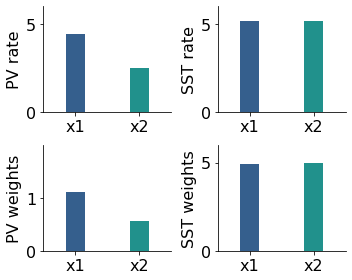

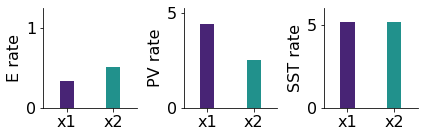

In [36]:
plt.figure(figsize=(5,4))

a1 = plt.subplot(221)
plt.bar([0,1],[np.mean(rP_monitor[5:int(T2/2)]),np.mean(rP_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(222)
plt.bar([0,1],[np.mean(rS_monitor[5:int(T2/2)]),np.mean(rS_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
a3 = plt.subplot(223)
plt.bar([0,1],[wPX1_monitor[-1],wPX2_monitor[-1]],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,2)
plt.xlim(-0.5,1.5)
plt.yticks([0,1],[0,1],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('PV weights',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

a4 = plt.subplot(224)
plt.bar([0,1],[wSX1_monitor[-1],wSX2_monitor[-1]],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a4.spines['top'].set_visible(False)
a4.spines['right'].set_visible(False)
plt.ylabel('SST weights',fontsize=16)
#plt.xlabel('time')
plt.tight_layout()
print(rS_monitor)
print(rP_monitor)
plt.savefig('./rates_and_weights_discrete.eps', bbox_inches='tight',rasterized=True)


plt.figure(figsize=(6,2))

a1 = plt.subplot(131)
plt.bar([0,1],[np.mean(rE_monitor[5:int(T2/2)]),np.mean(rE_monitor[int(T2/2)+5:])],color=[cm.viridis(.1),cm.viridis(.5)],width=0.3)
plt.ylabel('E rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,1],[0,1],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,1.25)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(132)
plt.bar([0,1],[np.mean(rP_monitor[5:int(T2/2)]),np.mean(rP_monitor[int(T2/2)+5:])],color=[cm.viridis(.1),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylim(0,5.25)
plt.xlim(-0.5,1.5)
a3 = plt.subplot(133)
plt.bar([0,1],[np.mean(rS_monitor[5:int(T2/2)]),np.mean(rS_monitor[int(T2/2)+5:])],color=[cm.viridis(.1),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

plt.tight_layout()

x_values = np.arange(0, 10, 0.001)
y1_values = stats.norm(Y1_mean, Y1_sigma)
y2_values = stats.norm(Y2_mean, Y2_sigma)
plt.savefig('./E_PV_SST_rates_discrete.pdf', bbox_inches='tight',rasterized=True)

<ipython-input-37-a07d1416e9d4>:146: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./proposal.pdf', bbox_inches='tight',rasterized=True)


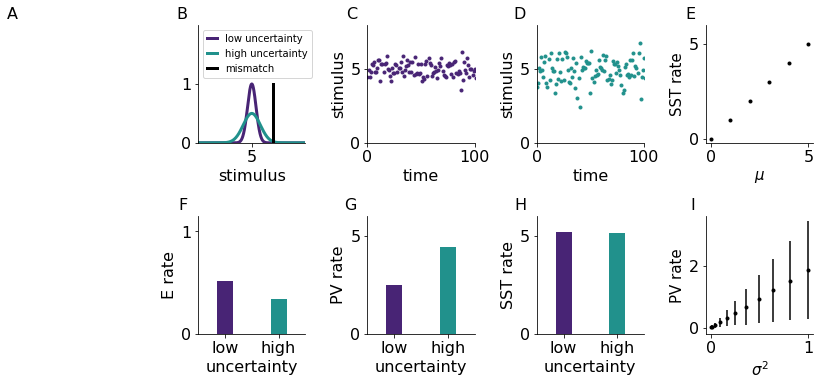

In [37]:
x_values = np.arange(0, 10, 0.001)
y1_values = stats.norm(Y1_mean, Y1_sigma)
y2_values = stats.norm(Y2_mean, Y2_sigma)

plt.figure(figsize=(11.5,5.5))

aa = plt.subplot(251)
aa.text(-0.1, 1.15, 'A', transform=aa.transAxes,
      fontsize=16, va='top', ha='right')
aa.spines['top'].set_visible(False)
aa.spines['right'].set_visible(False)
aa.spines['bottom'].set_visible(False)
aa.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])

#a = plt.subplot(241)
a = plt.subplot(252)
a.text(-0.1, 1.15, 'B', transform=a.transAxes,
      fontsize=16, va='top', ha='right')
plt.plot(x_values, y2_values.pdf(x_values), color = cm.viridis(0.1),linewidth =3,label='low uncertainty')
plt.plot(x_values, y1_values.pdf(x_values), color = cm.viridis(0.5),linewidth =3,label='high uncertainty')
plt.plot(np.ones((100))*7,np.arange(0,1,0.01),color = 'k',linewidth=3, label = 'mismatch')
ldg = plt.legend()
plt.xlim(0,10)
plt.ylim(0,2)
plt.yticks([0,1],[0,1],fontsize=16)
plt.xticks([5],[5],fontsize=16)
plt.xlabel('stimulus', fontsize = 16)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
#a.legend(loc='center left', bbox_to_anchor=(1, 0.5),fancybox=True, shadow=False)
a.legend(loc='upper left',markerscale=0.5,handlelength=1.0)#, bbox_to_anchor=(1, 0.5))


#plt.legend(loc='lower right')
a6 = plt.subplot(253)
a6.text(-0.1, 1.15, 'C', transform=a6.transAxes,
      fontsize=16, va='top', ha='right')
#plt.plot(rY1,'.',color =cm.viridis(.3))#, label='Y1: mean: %.1f, sigma: %.1f'%(Y1_mean,Y1_sigma))
plt.plot(rY2,'.',color =cm.viridis(.1))#, label='Y2: mean: %.1f, sigma: %.1f'%(Y2_mean,Y2_sigma))
#plt.axhline(y=0.1, color=cm.viridis(.5), linestyle='-',linewidth=20)

plt.ylabel('stimulus',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylim(0,8)
plt.xlim(0,100)
plt.yticks([0,5],[0,5],fontsize=16)
plt.xticks([0,100],[0,100],fontsize=16)
a6.spines['top'].set_visible(False)
a6.spines['right'].set_visible(False)


a0 = plt.subplot(254)
a0.text(-0.1, 1.15, 'D', transform=a0.transAxes,
      fontsize=16, va='top', ha='right')
plt.plot(rY1,'.',color =cm.viridis(.5))#, label='Y1: mean: %.1f, sigma: %.1f'%(Y1_mean,Y1_sigma))
#plt.axhline(y=0.1, color=cm.viridis(.1), linestyle='-',linewidth=20)

#plt.plot(rY2,'.',color =cm.viridis(.5))#, label='Y2: mean: %.1f, sigma: %.1f'%(Y2_mean,Y2_sigma))
plt.ylabel('stimulus',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a0.spines['top'].set_visible(False)
a0.spines['right'].set_visible(False)
plt.ylim(0,8)
plt.xlim(0,100)
plt.xticks([0,100],[0,100],fontsize=16)

a7 = plt.subplot(255)
a7.text(-0.1, 1.15, 'E', transform=a7.transAxes,
      fontsize=16, va='top', ha='right')
plt.errorbar(mean_range,SST_rates_mean, yerr=SST_std_mean, color = 'k', fmt='.')

plt.xlabel(r'$\mu$',fontsize=15)
plt.ylabel('SST rate',fontsize=15)
plt.xticks([0,5],[0,5],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
plt.ylim(-0.2,6)
a7.spines['top'].set_visible(False)
a7.spines['right'].set_visible(False)

ae = plt.subplot(256)
ae.spines['top'].set_visible(False)
ae.spines['right'].set_visible(False)
ae.spines['bottom'].set_visible(False)
ae.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])

a1 = plt.subplot(257)
a1.text(-0.1, 1.15, 'F', transform=a1.transAxes,
      fontsize=16, va='top', ha='right')
plt.bar([0,1],[np.mean(rE_monitor[int(T2/2)+5:]),np.mean(rE_monitor[5:int(T2/2)])],color=[cm.viridis(.1),cm.viridis(.5)],width=0.3)
plt.ylabel('E rate',fontsize=16)
plt.xticks([0,1],['low','high'],fontsize=16)
plt.yticks([0,1],[0,1],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,1.15)
plt.xlim(-0.5,1.5)
plt.xlabel('uncertainty',fontsize=16)


a2 = plt.subplot(258)
a2.text(-0.1, 1.15, 'G', transform=a2.transAxes,
      fontsize=16, va='top', ha='right')
plt.bar([0,1],[np.mean(rP_monitor[int(T2/2)+5:]),np.mean(rP_monitor[5:int(T2/2)])],color=[cm.viridis(.1),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['low','high'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
plt.ylim(0,6)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.xlim(-0.5,1.5)
plt.xlabel('uncertainty',fontsize=16)


a3 = plt.subplot(259)
a3.text(-0.1, 1.15, 'H', transform=a3.transAxes,
      fontsize=16, va='top', ha='right')
plt.bar([0,1],[np.mean(rS_monitor[int(T2/2)+5:]),np.mean(rS_monitor[5:int(T2/2)])],color=[cm.viridis(.1),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['low','high'],fontsize=16)
plt.xlabel('uncertainty',fontsize=16)


a3 = plt.subplot(2,5,10)
a3.text(-0.1, 1.15, 'I', transform=a3.transAxes,
      fontsize=16, va='top', ha='right')
plt.errorbar(sigma_range**2,PV_rates_sigma, yerr=PV_std_sigma, color = 'k',fmt='.')
plt.xlabel(r'$\sigma^2$',fontsize=15)
plt.ylabel('PV rate',fontsize=15)
plt.xticks([0.0,1.0],[0,1],fontsize=16)
plt.yticks([0,2],[0,2],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)

plt.tight_layout()

plt.savefig('./proposal.pdf', bbox_inches='tight',rasterized=True)

In [38]:
print(SST_std_mean)

[0.05961835 0.05959093 0.06082134 0.06298982 0.06609059 0.06995733]
